<a href="https://colab.research.google.com/github/wiksksmat/projects/blob/main/Classification_Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification is a fundamental task in supervised learning where the goal is to predict the categorical labels of new, unseen data based on historical data. In a classification project, a model is trained using a labeled dataset, where each instance is associated with a specific category. The trained model can then classify new instances into one of these predefined categories.

The process begins with data collection and preprocessing, ensuring the data is clean, consistent, and relevant. Following this, various algorithms, such as decision trees, support vector machines, or neural networks, are employed to build the model. The model's performance is evaluated using metrics like accuracy, precision, recall, and F1 score, guiding further refinements.

By the end of the project, the objective is to develop a robust classifier capable of making accurate predictions, facilitating decision-making processes in various applications, from medical diagnoses to spam detection.

# Data upload
effect is
df_train
df_test

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
import missingno as mno

In [2]:
url_train='https://raw.githubusercontent.com/wiksksmat/studia/main/wst%C4%99p_do_ai/praca_domowa_2/space_titanic_train.csv'
url_test='https://raw.githubusercontent.com/wiksksmat/studia/main/wst%C4%99p_do_ai/praca_domowa_2/space_titanic_test.csv'
df_train=pd.read_csv(url_train)
df_test=pd.read_csv(url_test)
print(df_train.head())
print(df_test.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
  

# Looking at Data
getting basic info about data types, searching for nan values

In [3]:
print(df_train.describe(),
df_train.info(),
df_train.isna().sum(),
df_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8

checiking for missing values, looking if there is need for imputation or picking estimator which handles nan values

In [4]:
print(df_test.describe(),
df_test.info(),
df_test.isna().sum(),
df_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    43

<Axes: >

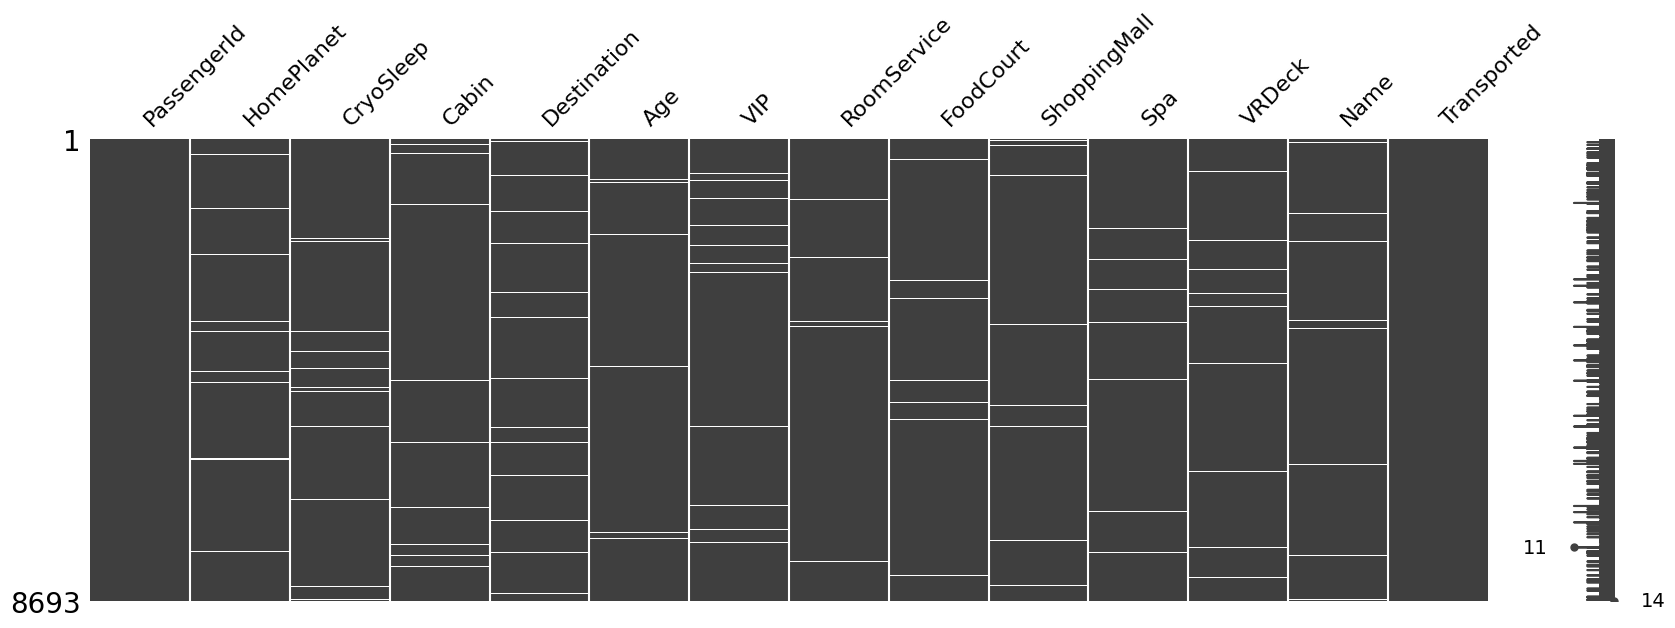

In [5]:

mno.matrix(df_train, figsize = (20, 6))

<Axes: >

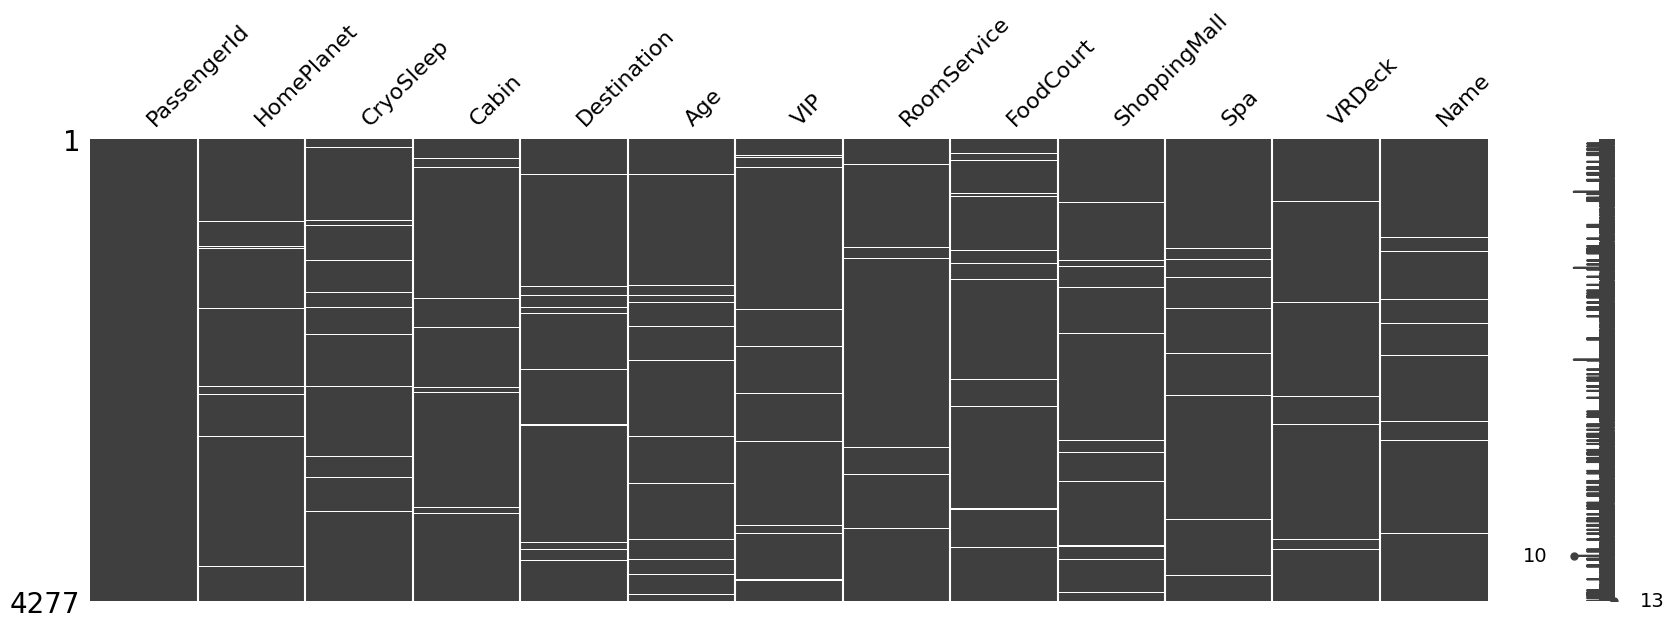

In [6]:
mno.matrix(df_test, figsize = (20, 6))

In [7]:
# checking categorical columns for weird, misspelled etc. values


for i in range(len(df_train.columns)):
    if df_train.iloc[:, i].dtype == 'object':
        unique_values = df_train.iloc[:, i].unique()
        print(f"Column {df_train.columns[i]} values are: {unique_values}")



Column PassengerId values are: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
Column HomePlanet values are: ['Europa' 'Earth' 'Mars' nan]
Column CryoSleep values are: [False True nan]
Column Cabin values are: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Column Destination values are: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Column VIP values are: [False True nan]
Column Name values are: ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


In [8]:
# checking categorical columns for weird, misspelled etc. values


for i in range(len(df_test.columns)):
    if df_test.iloc[:, i].dtype == 'object':
        unique_values = df_test.iloc[:, i].unique()
        print(f"Column {df_test.columns[i]} values are: {unique_values}")



Column PassengerId values are: ['0013_01' '0018_01' '0019_01' ... '9271_01' '9273_01' '9277_01']
Column HomePlanet values are: ['Earth' 'Europa' 'Mars' nan]
Column CryoSleep values are: [True False nan]
Column Cabin values are: ['G/3/S' 'F/4/S' 'C/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
Column Destination values are: ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
Column VIP values are: [False nan True]
Column Name values are: ['Nelly Carsoning' 'Lerome Peckers' 'Sabih Unhearfus' ... 'Jayrin Pore'
 'Kitakan Conale' 'Lilace Leonzaley']


# New Section


i add column with all expenses of passanger

In [ ]:
df_train['SpendingSum']=(df_train['RoomService']+df_train['FoodCourt']+df_train['ShoppingMall']+df_train['Spa']+df_train['VRDeck'])
df_test['SpendingSum']=(df_test['RoomService']+df_test['FoodCourt']+df_test['ShoppingMall']+df_test['Spa']+df_test['VRDeck'])


# EDA

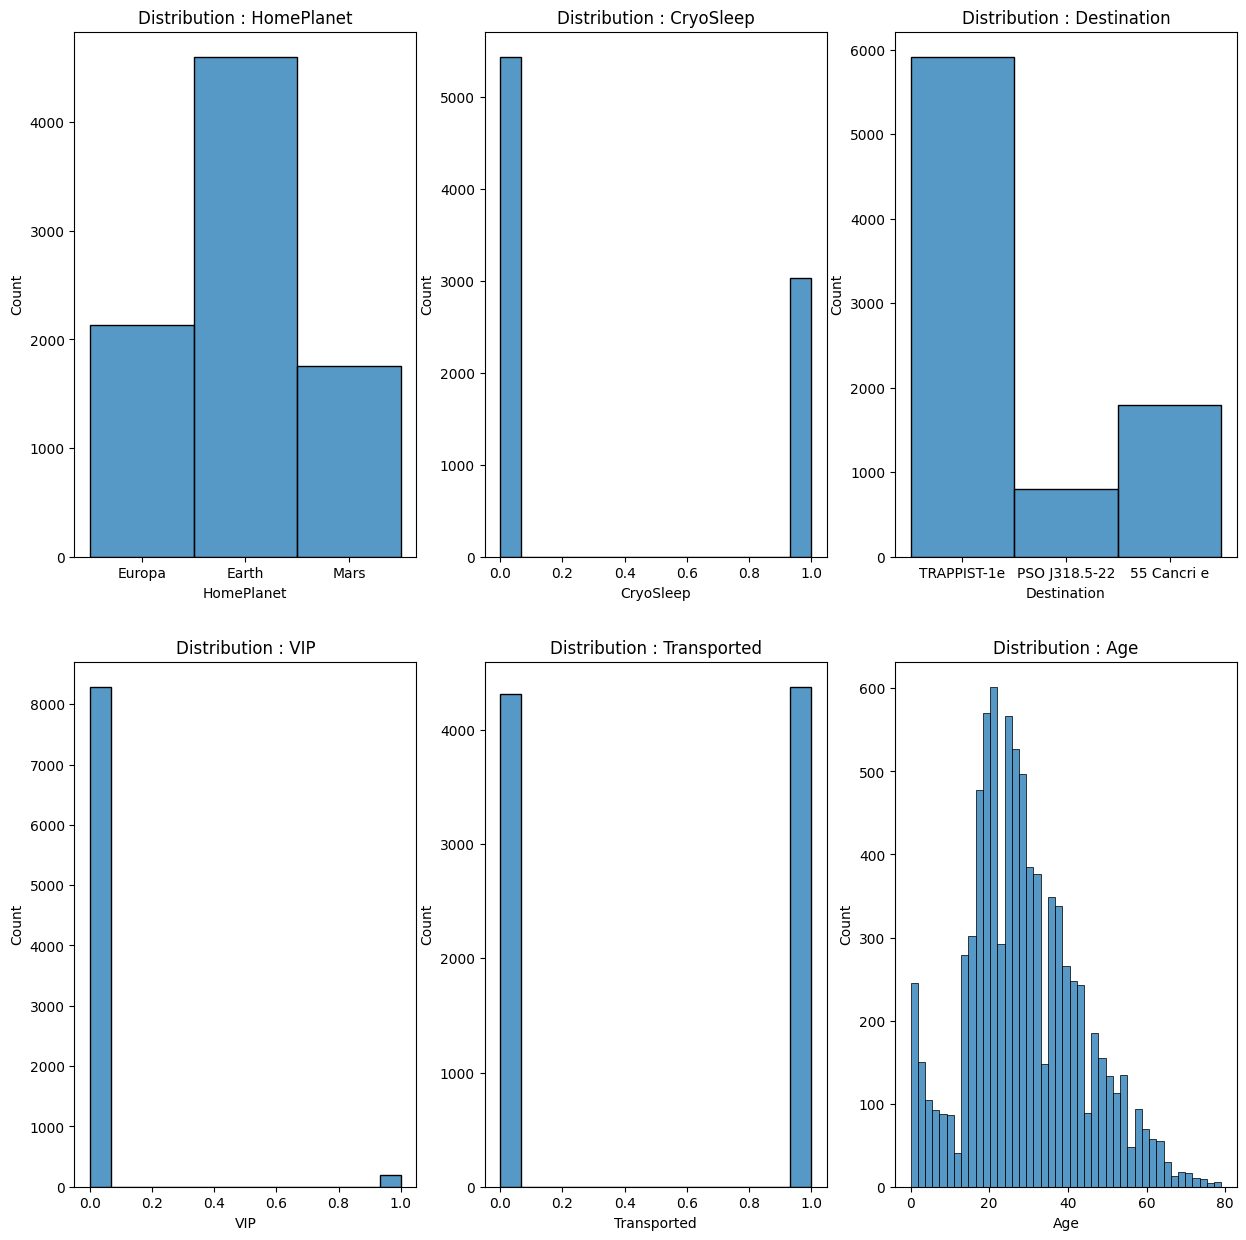

In [ ]:
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported','Age']
colors = ['#FF781F', '#2D2926']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

for i in range(len(columns)):
    row = i // 3
    col = i % 3
    sns.histplot(data=df_train, x=columns[i], ax=ax[row, col])
    title = 'Distribution : ' + columns[i]
    ax[row, col].set_title(title)

plt.show()

      VIP      facility    spendings
0   False   SpendingSum  1411.643705
1    True   SpendingSum  4599.737430
2   False           Spa   301.711045
3    True           Spa   760.710660
4   False   RoomService   217.218527
5    True   RoomService   473.615385
6   False  ShoppingMall   173.876298
7    True  ShoppingMall   247.726804
8   False        VRDeck   282.718056
9    True        VRDeck  1234.856410
10  False     FoodCourt   426.336536
11   True     FoodCourt  1811.393782


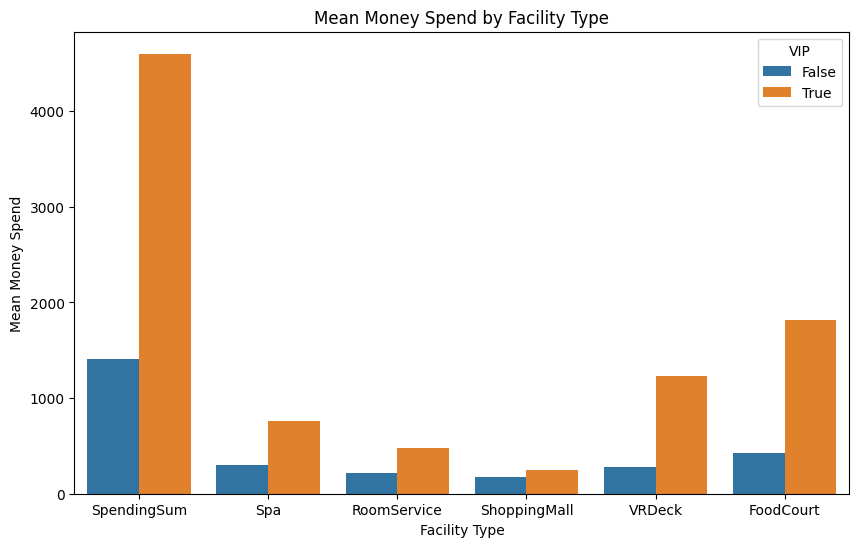

In [ ]:
spendings_by_type=df_train.groupby('VIP')[['SpendingSum','Spa','RoomService','ShoppingMall','VRDeck','FoodCourt']].mean().reset_index()
spendings_by_type = pd.melt(spendings_by_type, id_vars='VIP', var_name='facility', value_name='spendings')


print(spendings_by_type)


plt.figure(figsize=(10,6))
sns.barplot(data=spendings_by_type,x='facility',y='spendings',hue="VIP")
plt.xlabel('Facility Type')
plt.ylabel('Mean Money Spend')
plt.title('Mean Money Spend by Facility Type')
plt.show()

Index(['Transported', False, True], dtype='object', name='VIP')
     VIP           Status  Count
0  False  not_transported   4093
1   True  not_transported   4198
2  False      Transported    123
3   True      Transported     76


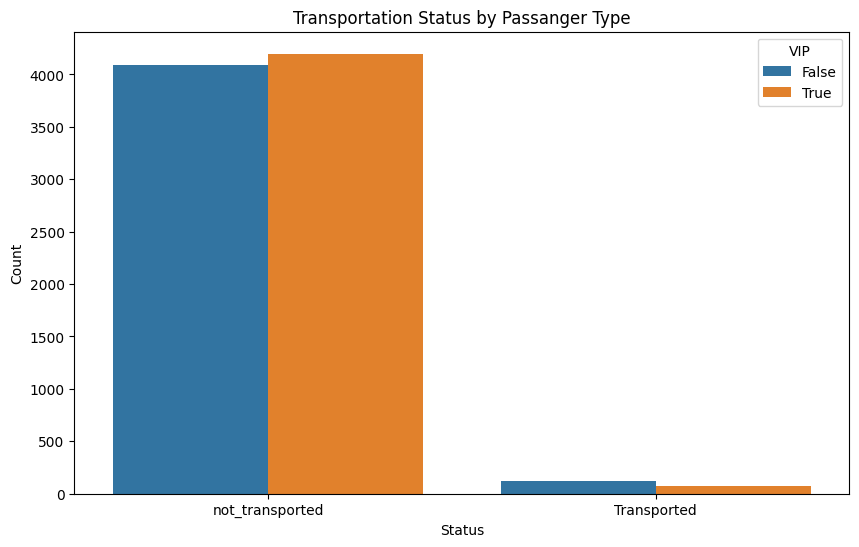

In [ ]:
#is it good to be a vip?
transported_by_type=df_train.groupby(['Transported', 'VIP']).size().unstack().reset_index()
print(transported_by_type.columns)
transported_by_type =transported_by_type.rename(columns={"Transported": "VIP", False: "not_transported",True:'Transported'})
transported_by_type=transported_by_type.melt(id_vars=['VIP'],
                                                      value_vars=['not_transported','Transported'],
                                                      var_name='Status',
                                                      value_name='Count')

print(transported_by_type)


plt.figure(figsize=(10,6))
sns.barplot(data=transported_by_type,x='Status',y='Count',hue="VIP")
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Transportation Status by Passanger Type')
plt.show()

# Preparation

preparation of test and training data, droping columns id, cabin and name, and creating dummies

In [ ]:
df_train=pd.read_csv(url_train)
print(df_train.shape)

df_train['SpendingSum']=(df_train['RoomService']+df_train['FoodCourt']+df_train['ShoppingMall']+df_train['Spa']+df_train['VRDeck'])
df_train=df_train.drop(labels=['PassengerId','Cabin','Name'],axis=1)
print(df_train.shape)
df_train=pd.get_dummies(df_train,columns=['VIP','CryoSleep','Destination','HomePlanet'])
df_train.shape

(8693, 14)
(8693, 12)


(8693, 18)

In [ ]:
df_test=pd.read_csv(url_test)
print(df_test.shape)
print(df_test.head())
df_test['SpendingSum']=(df_test['RoomService']+df_test['FoodCourt']+df_test['ShoppingMall']+df_test['Spa']+df_test['VRDeck'])
df_test=df_test.drop(labels=['PassengerId','Cabin','Name'],axis=1)
print(df_test.shape)
df_test=pd.get_dummies(df_test,columns=['VIP','CryoSleep','Destination','HomePlanet'])
df_test.shape

(4277, 13)
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez  
(4277, 11)


(4277, 17)

In [ ]:
y_train=df_train['Transported']
X_train=df_train.drop(labels='Transported',axis=1)

X_test=df_test
print(X_train)

       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  SpendingSum  \
0     39.0          0.0        0.0           0.0     0.0     0.0          0.0   
1     24.0        109.0        9.0          25.0   549.0    44.0        736.0   
2     58.0         43.0     3576.0           0.0  6715.0    49.0      10383.0   
3     33.0          0.0     1283.0         371.0  3329.0   193.0       5176.0   
4     16.0        303.0       70.0         151.0   565.0     2.0       1091.0   
...    ...          ...        ...           ...     ...     ...          ...   
8688  41.0          0.0     6819.0           0.0  1643.0    74.0       8536.0   
8689  18.0          0.0        0.0           0.0     0.0     0.0          0.0   
8690  26.0          0.0        0.0        1872.0     1.0     0.0       1873.0   
8691  32.0          0.0     1049.0           0.0   353.0  3235.0       4637.0   
8692  44.0        126.0     4688.0           0.0     0.0    12.0       4826.0   

      VIP_False  VIP_True  

preprocessing, i had skip rfecv and pca as its lowers accurary, experiment documentation shoud be handled better

In [ ]:
y_train=df_train['Transported']
X_train=df_train.drop(labels='Transported',axis=1)
estimator = SVR(kernel="linear")


scaler=StandardScaler()

imputer=IterativeImputer(estimator=estimator, max_iter=100,add_indicator=True)



pipe=Pipeline([
              ('imputer', imputer),
              ('scaler', scaler),

               ])

X_train_imputed_scaled=pipe.fit_transform(X_train)


performing random search with random forest classifier,
i choosed it because in documentation its written that it handles nan values, however i get error which said that RFC does not handle nan values

https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X_test=df_test




clf = RandomForestClassifier(random_state = 42)
# Number of trees in random forest
n_estimators = [200,500,1000]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,20,40,60,80,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


bootstrap=[True,False]
# Method of selecting samples for training each tree

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
               }

rf_grid=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,cv=4,n_iter=10,verbose=2,scoring='accuracy')
rf_grid.fit(X_train_imputed_scaled,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.8s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.7s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  10.3s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  10.5s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_es

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 40, 60, 80,
                                                      100, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 500, 1000]},
                   scoring='accuracy', verbose=2)

In [ ]:

print(rf_grid.best_params_,
rf_grid.best_score_)

{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True} 0.7952375922450448


In [ ]:
model=RandomForestClassifier(random_state = 42)
model.set_params(**rf_grid.best_params_)
print(rf_grid.best_params_,
rf_grid.best_score_)


{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True} 0.7952375922450448


In [ ]:
X_test_imputed_scaled=pipe.transform(X_test)
model.fit(X_train_imputed_scaled,y_train)

print(X_train_imputed_scaled.shape,X_test_imputed_scaled.shape)


y_pred=model.predict(X_test_imputed_scaled)
print(y_pred)

(8693, 17) (4277, 17)
[ True False  True ...  True  True  True]
